In [230]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 25 10:40:42 2020

@author: sturkars
"""
import numpy as np
import pandas as pd
from scipy import stats
from numpy import random as rd
import os
import json
from sklearn.decomposition import PCA
import multiprocessing, multiprocessing.pool
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from sklearn.manifold import TSNE
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree
import miner_py3 as miner
%matplotlib inline
plt.style.use('ggplot')
import sys
import glob
#import miner as miner
from scipy.stats import zscore
from tqdm.notebook import tqdm, trange

# change the working directory
#os.chdir('/Users/serdarturkaslan/Documents/GitHub/GbmMINER/data/MINER_MicroLowessRNATMM.08.24.2020/')
# output directory
output_dir = "/Volumes/omics4tb2/SYGNAL/XCures"

# create results directory
resultsDirectory = os.path.join(os.path.split(os.getcwd())[0],resultsFolder)
if not os.path.isdir(resultsDirectory):
    os.mkdir(resultsDirectory)

print("Libraries loaded!")

Libraries loaded!


In [163]:
output_dir = "/Volumes/omics4tb2/SYGNAL/XCures"
patientID = "TL-19-87E3E1"
filename = os.path.join("/Volumes/omics4tb2/SYGNAL/XCures/patients_processed_data/TL-19-87E3E1/RNA", patientID + "_tpm.csv")
patientExpression = miner.readFileToDf(filename)
patientExpression1 = miner.identifierConversion(patientExpression, "identifier_mappings.txt")

completed identifier conversion.
9228 genes were converted.


In [165]:
patientExpression1

(                    TPM
 ENSG00000188313   42.27
 ENSG00000148672   66.09
 ENSG00000198837   80.13
 ENSG00000170442    0.18
 ENSG00000157445    0.71
 ...                 ...
 ENSG00000132507  458.88
 ENSG00000214706   31.69
 ENSG00000159263    3.91
 ENSG00000120907   11.10
 ENSG00000136250    8.19
 
 [9228 rows x 1 columns],
 Preferred_Name
 ENSG00000188313    ENSG00000188313
 ENSG00000148672    ENSG00000148672
 ENSG00000198837    ENSG00000198837
 ENSG00000170442    ENSG00000170442
 ENSG00000157445    ENSG00000157445
                         ...       
 ENSG00000132507    ENSG00000132507
 ENSG00000214706    ENSG00000214706
 ENSG00000159263    ENSG00000159263
 ENSG00000120907    ENSG00000120907
 ENSG00000136250    ENSG00000136250
 Name: Name, Length: 9228, dtype: object)

In [140]:
patientExpressionZeroFiltered = miner.removeNullRows(patientExpression)
patientExpressionZeroFiltered

TPM
ENSG00000000003   21.84
ENSG00000000005    0.20
ENSG00000000419   46.71
ENSG00000000457    8.98
ENSG00000000460   21.94
...                 ...
ENSG00000278677  399.91
ENSG00000278705  179.64
ENSG00000278828   36.75
ENSG00000280987    6.79
ENSG00000282608   14.16

[9148 rows x 1 columns]

In [143]:
resultsDirectory='/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-test'

## User defined variables
inputDataFile1= resultsDirectory + '/GbmTCGALowessMicroarrayFilteredWithIDs.csv'
inputDataFile2= resultsDirectory + '/GbmTCGATMMRNASeqFilteredWithGeneIDs.csv'

## Read expression data and conversion table        
expressionData1=pd.read_csv(inputDataFile1,header=0,index_col=0,sep=",")
expressionData2=pd.read_csv(inputDataFile2,header=0,index_col=0,sep=",")
cols_micro = set(expressionData1.columns)
cols_rna = set(expressionData2.columns)
cols_common = list(cols_rna.intersection(cols_micro))
cols_mrnaonly = list(cols_rna.difference(cols_micro))
cols_microonly = list(cols_micro.difference(cols_rna))
expressionData_rna = expressionData2[cols_mrnaonly+cols_common]
expressionData_micro = expressionData1[cols_microonly] 
expressionData1
#expressionData = pd.merge(expressionData_rna, expressionData_micro, left_index = True, right_index = True)
#expressionData = miner.zscore(expressionData)
#expressionData.to_csv(resultsDirectory + "/GbmMicroRNAMergedWithIDsZScored.csv")

TCGA-02-0001  TCGA-02-0003  TCGA-02-0004  TCGA-02-0007  \
ENSG00000282928      1.626872      3.245535      0.583977     -0.539433   
ENSG00000110514      0.132557     -0.358097     -0.493060     -1.093411   
ENSG00000076864     -1.199104     -0.209317     -1.372097      0.981869   
ENSG00000086015      0.066533     -0.763172      1.206356     -0.837177   
ENSG00000126231      2.238707      0.843115     -0.602868      1.536771   
...                       ...           ...           ...           ...   
ENSG00000143450     -0.469676     -0.763673      0.043146      3.708247   
ENSG00000182872     -1.460959     -0.927080      0.118465     -0.576579   
ENSG00000182871     -0.261911     -0.160460      2.382046     -0.641611   
ENSG00000124935     -0.417782     -0.659914     -0.088289     -0.435930   
ENSG00000124939      0.005349      0.057847     -0.183378      0.337176   

                 TCGA-02-0009  TCGA-02-0010  TCGA-02-0011  TCGA-02-0014  \
ENSG00000282928     -0.811121     -0.252353     11.666006     -1.155166   
ENSG00000110514     -0.112464     -0.629408     -0.055410      0.485146   
ENSG00000076864     -0.985335     -1.155406     -1.693464     -0.438067   
ENSG00000086015     -0.552505     -0.897986     -1.293157      1.367767   
ENSG00000126231      0.780331      2.071012      1.383950      1.075322   
...                       ...           ...           ...           ...   
ENSG00000143450     -0.870877     -0.514066     -1.378862     -0.939845   
ENSG00000182872     -0.026463      0.190539      0.417237      1.727655   
ENSG00000182871      0.621794      1.864339     -2.461498     -1.239618   
ENSG00000124935     -0.294314      5.959505     -0.723926     -0.674568   
ENSG00000124939     -0.174598      2.472805      0.008626     -0.113307   

                 TCGA-02-0015  TCGA-02-0016  ...  TCGA-76-4932  TCGA-76-4934  \
ENSG00000282928     -0.085003     -0.142124  ...      0.808686     -0.075679   
ENSG00000110514     -1.336014     -0.024817  ...     -1.069072     -0.135248   
ENSG00000076864     -0.456489     -0.455400  ...     -0.916479      1.039652   
ENSG00000086015     -0.400182     -0.471835  ...      0.976336      0.256081   
ENSG00000126231      0.427024     -0.301741  ...     -0.615402     -0.157650   
...                       ...           ...  ...           ...           ...   
ENSG00000143450     -0.593286     -1.310538  ...      2.415580     -0.354386   
ENSG00000182872     -0.067855     -0.306262  ...      0.713230      0.940949   
ENSG00000182871     -0.203436     -1.202425  ...     -0.249474     -0.623040   
ENSG00000124935     -0.678084     -0.231703  ...     -0.769911     -0.289596   
ENSG00000124939     -0.162238     -0.536159  ...     -0.311613     -0.113516   

                 TCGA-76-4935  TCGA-76-6191  TCGA-76-6192  TCGA-76-6193  \
ENSG00000282928      0.222748     -0.866822      0.014592      0.588783   
ENSG00000110514     -0.200050      1.634821      2.259950      1.511491   
ENSG00000076864      0.770609      0.587498      1.078999     -0.076697   
ENSG00000086015      0.620335      1.492944      1.755095      1.186028   
ENSG00000126231     -0.755154     -1.336459     -2.088592     -1.941888   
...                       ...           ...           ...           ...   
ENSG00000143450     -0.300063      0.432101      0.819832      0.977177   
ENSG00000182872      0.626629      1.624070      1.147605      0.778013   
ENSG00000182871      1.038345      2.009047      1.758990      1.587418   
ENSG00000124935     -0.181450     -0.735886     -0.593842     -0.436250   
ENSG00000124939     -0.313457     -0.424238     -0.385550     -0.451919   

                 TCGA-76-6282  TCGA-76-6285  TCGA-81-5910  TCGA-87-5896  
ENSG00000282928      1.046606      2.830748     -1.292279     -0.609040  
ENSG00000110514      1.493434      1.234930      1.431231      1.561527  
ENSG00000076864      0.619106      0.486909     -1.226351      0.811955  
ENSG00000086015      0.464289      1.716178      1.001798

In [144]:
expressionData2

TCGA-02-0047  TCGA-02-0055  TCGA-02-2483  TCGA-02-2485  \
ENSG00000283681      0.762666     -0.063949      0.551266      1.062908   
ENSG00000283652      0.912992      0.052012     -0.520493     -0.650531   
ENSG00000283649     -0.479942      0.080461     -1.827434      0.325570   
ENSG00000283632      0.744982     -0.342226      0.588182     -1.452889   
ENSG00000283630     -0.842501      1.158995      1.176614     -0.691178   
...                       ...           ...           ...           ...   
ENSG00000000460     -0.621627      0.149360      0.623794      0.990380   
ENSG00000000457     -0.835419      0.289068     -0.037962      0.360393   
ENSG00000000419     -1.582759      2.257780      1.654165     -0.522788   
ENSG00000000005     -0.461856      4.750890     -0.424956     -0.301776   
ENSG00000000003     -0.509032     -0.362480      0.088498      0.364179   

                 TCGA-02-2486  TCGA-06-0125  TCGA-06-0125.1  TCGA-06-0129  \
ENSG00000283681     -1.010123      0.249734        0.804120      0.628133   
ENSG00000283652      0.944506     -0.468469        0.694973      1.830567   
ENSG00000283649      0.388521      0.485268        1.068773      0.893539   
ENSG00000283632     -0.677733      0.447141       -0.640272     -1.698157   
ENSG00000283630      1.150541     -0.968644       -1.068849     -1.637201   
...                       ...           ...             ...           ...   
ENSG00000000460     -0.728789      0.385025       -1.278000      1.479346   
ENSG00000000457      1.413672     -0.684731       -0.343926      0.901035   
ENSG00000000419      0.944567     -0.088541       -1.166150     -0.724542   
ENSG00000000005     -0.212631     -0.355482       -0.461856     -0.327507   
ENSG00000000003      1.063092     -0.069740        0.205782     -0.226978   

                 TCGA-06-0130  TCGA-06-0132  ...  TCGA-41-3915  TCGA-41-4097  \
ENSG00000283681      0.352629     -0.263105  ...     -0.442506     -0.296992   
ENSG00000283652      1.887370      1.273334  ...      0.376701      0.836723   
ENSG00000283649     -0.848154      0.915395  ...     -0.149412      0.813126   
ENSG00000283632      0.085623     -0.634759  ...      1.333444      0.087426   
ENSG00000283630      0.392719     -0.549829  ...     -0.805287     -1.051327   
...                       ...           ...  ...           ...           ...   
ENSG00000000460      0.853374     -0.040307  ...      0.116621     -2.007843   
ENSG00000000457      0.233061     -1.880318  ...     -0.230176     -0.540911   
ENSG00000000419      0.956758     -0.775933  ...     -0.831172     -1.188112   
ENSG00000000005     -0.372330     -0.256618  ...     -0.461856     -0.461856   
ENSG00000000003     -0.746172     -1.126251  ...      0.274005     -0.719666   

                 TCGA-41-5651  TCGA-76-4925  TCGA-76-4926  TCGA-76-4927  \
ENSG00000283681      1.844149     -0.712907      0.000980     -0.369704   
ENSG00000283652     -1.317534     -0.969677     -0.273364      0.861204   
ENSG00000283649     -0.394663      0.008050      0.436319     -1.428485   
ENSG00000283632      0.622355      0.611607     -1.218859      1.493873   
ENSG00000283630     -0.949069     -0.080784     -0.181449     -1.239190   
...                       ...           ...           ...           ...   
ENSG00000000460      0.778456      0.527303     -0.594949     -0.110041   
ENSG00000000457      0.999167      0.546793      0.274194     -0.974555   
ENSG00000000419      0.570384      1.851286     -0.811651     -1.124876   
ENSG00000000005     -0.304323     -0.423374      0.580940     -0.461856   
ENSG00000000003     -0.416611      0.151655      0.809823      0.044561   

                 TCGA-76-4928  TCGA-76-4929  TCGA-76-4931  TCGA-76-4932  
ENSG00000283681      0.314249     -0.062913      0.799903      0.113620  
ENSG00000283652     -0.123449      0.122895     -0.500919     -0.144817  
ENSG00000283649     -0.338687      1.411108      0.347337     -0.625776  
ENSG00000283632      0.619726    

In [128]:
cutoff = stats.norm.ppf(0.00001)
#processedTPM = miner.preProcessTPM(rawExpressionZeroFiltered)
tmp_array_raw = np.array(rawExpressionZeroFiltered)
tmp_array_raw
keep = []
keepappend = keep.append
for i in range(0,tmp_array_raw.shape[0]):
    if np.count_nonzero(tmp_array_raw[i,:]) >= round(float(tpm.shape[1])*0.5):
        keepappend(i)
        
tpm_zero_filtered = tmp_array_raw[keep,:]
tpm_array = np.array(tpm_zero_filtered)
positive_medians = []

for i in range(0,tpm_array.shape[1]):
    tmp1 = tpm_array[:,i][tpm_array[:,i]>0]
    positive_medians.append(np.median(tmp1))

scale_factors = [float(1023)/positive_medians[i] for i in range(0,len(positive_medians))]
tpm_scale = np.zeros(tpm_array.shape)
for i in range(0,tpm_scale.shape[1]):
    tpm_scale[:,i] = tpm_array[:,i]*scale_factors[i]
    
tpm_scale_log2 = np.zeros(tpm_scale.shape)
for i in range(0,tpm_scale_log2.shape[1]):
    tpm_scale_log2[:,i] = np.log2(tpm_scale[:,i]+1)
    
tpm_filtered_df = pd.DataFrame(tpm_scale_log2)
tpm_filtered_df.columns = list(tpm.columns)
tpm_filtered_df.index = list(np.array(tpm.index)[keep])

qn_tpm_filtered = miner.quantile_norm(tpm_filtered_df,axis=0)
qn_tpm = miner.quantile_norm(qn_tpm_filtered,axis=1)

qn_tpm_array = np.array(qn_tpm)

In [136]:
print(qn_tpm)

                  TPM
ENSG00000000003  10.0
ENSG00000000005  10.0
ENSG00000000419  10.0
ENSG00000000457  10.0
ENSG00000000460  10.0
...               ...
ENSG00000278677  10.0
ENSG00000278705  10.0
ENSG00000278828  10.0
ENSG00000280987  10.0
ENSG00000282608  10.0

[9148 rows x 1 columns]


In [102]:
#zscoredExpression = miner.zscore(rawExpressionZeroFiltered)
#zscoredExpression = miner.correctBatchEffects(rawExpressionZeroFiltered)
means = rawExpressionZeroFiltered.T.mean(axis=1,skipna=True)
stds = rawExpressionZeroFiltered.T.std(axis=1,skipna=True)
meanCheck = np.mean(rawExpressionZeroFiltered[rawExpressionZeroFiltered>zero].mean(axis=1,skipna=True))
print("Mean:", means)
print("Stds:", stds)
print("MeanCheck:", meanCheck)




Mean: TPM    60.479142
dtype: float64
Stds: TPM    221.495825
dtype: float64
MeanCheck: 60.55194046185837


In [222]:
output_dir = "/Volumes/omics4tb2/SYGNAL/XCures"
patientID = "TL-19-87E3E1"
filename = os.path.join("/Volumes/omics4tb2/SYGNAL/XCures/patients_processed_data/TL-19-87E3E1/RNA", patientID + "_withcohort_tpm.csv")
patientExpression = miner.readFileToDf(filename)

In [224]:
zz = miner.preProcessTPM(patientExpression)

/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


<Figure size 432x288 with 0 Axes>

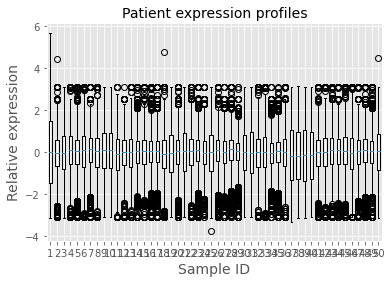

<Figure size 432x288 with 0 Axes>

In [226]:
individual_expression_data = [zz.iloc[:,i] for i in range(50)]
_ = plt.boxplot(individual_expression_data)
plt.title("Patient expression profiles",FontSize=14)
plt.ylabel("Relative expression",FontSize=14)
plt.xlabel("Sample ID",FontSize=14)
plt.figure()

In [231]:
arrayexpdf = miner.zerofilter(patientExpression)     
expdf = arrayexpdf
expdf = expdf.fillna(0)
expdf = miner.removeNullRows(expdf)
expdf = miner.entropycheck(expdf)
expressionData=miner.zscore(expdf)

AttributeError: module 'miner_py3' has no attribute 'zerofilter'

In [221]:
#inputRNAFile = "/Users/serdarturkaslan/Downloads/gbm_tcga/data_mrna_seq_v2_rsem.txt"
#inputRNA = pd.read_csv(inputRNAFile,header=0,index_col=[1],sep="\t")
#inputRNA = inputRNA.drop(inputRNA.columns[[0]], axis=1)
inputRNAIDed = miner.preprocess(filename)
#conversionTable = pd.read_csv("identifier_mappings.txt",sep="\t")





#inputRNAEmsembl = miner.convertToEnsembl(inputRNA, conversionTable, input_format=2)

#inputRNAIDed
#inputRNAprocessed = miner.preProcessTPM(inputRNA)
#inputRNAprocessed
#conversionTable

completed z-transformation.


ValueError: Length mismatch: Expected axis has 15765 elements, new values have 15751 elements

In [216]:
conversionTableEnsg = conversionTable.copy()
conversionTableEnsg.index = conversionTableEnsg.iloc[:,0]
conversionTableEnsg

# Use Counter to count redundancies in ENSG row
ensg = np.array(conversionTableEnsg.iloc[:,0])
ensgCount = Counter(ensg)
ensgCountMC = ensgCount.most_common()
ensgCountMC

# Use Counter results to identify which genes need special conversion
special_conversion = np.where(np.vstack(ensgCountMC)[:,1].astype(int)>1)[0]
normal_conversion = np.where(np.vstack(ensgCountMC)[:,1].astype(int)==1)[0]

input_format = conversionTableEnsg.columns[1]
input_format

index_set = set(df.index)
# Convert identifiers with >1 alias
conversionEnsg = []
conversionAffy = []
# for i in special_conversion:
#     print(i)
#     tmp_ensg = ensgCountMC[i][0]
#     print(tmp_ensg)
#     tmp_genes = list(set(list(conversionTableEnsg.loc[tmp_ensg,input_format]))&index_set)
#     print(tmp_genes)
#     conv = np.argmax(np.mean(df.loc[tmp_genes,:],axis=1))
#     print(conv)
#     conversionEnsg.append(tmp_ensg)
#     conversionAffy.append(conv)
    
# Convert identifiers with exactly 1 match
for j in special_conversion:
    tmp_ensg = ensgCountMC[j][0]
    conv = conversionTableEnsg.loc[tmp_ensg,input_format]
    conversionEnsg.append(tmp_ensg)
    conversionAffy.append(conv)    

ENSG00000234651
Preferred_Name
ENSG00000234651               7917
ENSG00000234651    ENSG00000096155
ENSG00000234651    ENSG00000204463
ENSG00000234651    ENSG00000227761
ENSG00000234651    ENSG00000228760
                        ...       
ENSG00000234651          NP_542434
ENSG00000234651               BAT3
ENSG00000234651             D6S52E
ENSG00000234651                 G3
ENSG00000234651             P46379
Name: Name, Length: 191, dtype: object
ENSG00000235915
Preferred_Name
ENSG00000235915               7940
ENSG00000235915    ENSG00000204482
ENSG00000235915    ENSG00000206433
ENSG00000235915    ENSG00000223465
ENSG00000235915    ENSG00000226182
                        ...       
ENSG00000235915          NP_995311
ENSG00000235915          NP_995312
ENSG00000235915               B144
ENSG00000235915             D6S49E
ENSG00000235915             O00453
Name: Name, Length: 183, dtype: object
ENSG00000234078
Preferred_Name
ENSG00000234078          100616237
ENSG00000234078         

KeyboardInterrupt: 

In [215]:
print(conversionAffy)
# Prepare results dataframe 
#conversion_df = pd.DataFrame(conversionEnsg)
conversion_df = pd.DataFrame(conversionAffy)
#conversion_df.index = conversionAffy
#conversion_df.columns = ["Ensembl"]
print(conversion_df)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [13]:
# change the working directory
#os.chdir('/Users/serdarturkaslan/Documents/GitHub/GbmMINER/data/MINER_MicroLowessRNATMM.08.24.2020/')
# output directory
output_dir = "/Volumes/omics4tb2/SYGNAL/XCures"

# Path to the miner directory
input_path = "/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020"
print("Libraries loaded!")


patientID = "TL-19-87E3E1"
print(patientID)
patientDataFile = os.path.join(folder,"RNA",patientID + ".genes.results") # get RNASeq results

# create patent activity output folder if it doesnt exist already
activity_output_dir = os.path.join(output_dir,"patients_network_activities",patientID)

# Check if patient data file exists
if os.path.exists('%s' %(patientDataFile)):
    # create a new column with patient name
    #newColName = patientID + "_zscore"

    # Read expression data
    rawExpressionData = pd.read_csv(patientDataFile, sep="\t", index_col=None, header = 0)
    #print(rawExpressionData.head)

    # seperate ensembl gene ids and symbols
    rawExpressionData[['GeneID','gene_symbol']] = pd.DataFrame(rawExpressionData).gene_id.str.split("_",expand=True)

    # Filter ncRNAs or ribosomal RNAs
    rawExpressionData = rawExpressionData[-rawExpressionData.GeneID.isin(ribosomal)].copy()
    
    # filter for genes in all programs
    #rawExpressionDataFilt = rawExpressionData[rawExpressionData.GeneID.isin(uniqueProteins)].copy()
    rawExpressionDataFilt = rawExpressionData[rawExpressionData.GeneID.isin(bkgd_genes)].copy()

     # seperate ensembl gene ids and symbols
    rawExpressionDataFilt[['GeneID','gene_symbol']] = pd.DataFrame(rawExpressionDataFilt).gene_id.str.split("_",expand=True)
    #print(rawExpressionData)
    rawExpressionData = rawExpressionDataFilt[['GeneID','TPM']]

    rawExpressionData.to_csv(os.path.join(folder,"RNA",str(patientID) + "_tpm.csv"), index=False)
    print(rawExpressionData.head())
    
    expressionData, conversionTable = miner.preprocess(os.path.join(folder,"RNA",patientID + "_tpm.csv"))
    #expressionData.to_csv(os.path.join(folder,"RNA",patientID + "_tpm_exp.csv"), index=False)

    print(expressionData.head())

Libraries loaded!


NameError: name 'patientDataFolders' is not defined

In [84]:
patientID = "TL-19-87E3E1"
filename = os.path.join("/Volumes/omics4tb2/SYGNAL/XCures/patients_processed_data/TL-19-87E3E1/RNA", patientID + "_tpm.csv")
    
extension = filename.split(".")[-1]
if extension == "csv":
    df = pd.read_csv(filename,index_col=0,header=0)
    shape = df.shape
    if shape[1] == 0:
        df = pd.read_csv(filename,index_col=0,header=0,sep="\t")
elif extension == "txt":
    df = pd.read_csv(filename,index_col=0,header=0,sep="\t")
    shape = df.shape
    if shape[1] == 0:
        df = pd.read_csv(filename,index_col=0,header=0)    


In [85]:
df.head

<bound method NDFrame.head of                     TPM
ENSG00000000003   21.84
ENSG00000000005    0.20
ENSG00000000419   46.71
ENSG00000000457    8.98
ENSG00000000460   21.94
...                 ...
ENSG00000278677  399.91
ENSG00000278705  179.64
ENSG00000278828   36.75
ENSG00000280987    6.79
ENSG00000282608   14.16

[9228 rows x 1 columns]>

In [22]:
minimum = np.percentile(df,0)
if minimum == 0:
    filteredDf = df.loc[df.sum(axis=1)>0,:]
else:
    filteredDf = df

In [24]:
filteredDf.head

<bound method NDFrame.head of                     TPM
GeneID                 
ENSG00000000003   21.84
ENSG00000000005    0.20
ENSG00000000419   46.71
ENSG00000000457    8.98
ENSG00000000460   21.94
...                 ...
ENSG00000278677  399.91
ENSG00000278705  179.64
ENSG00000278828   36.75
ENSG00000280987    6.79
ENSG00000282608   14.16

[9148 rows x 1 columns]>

In [70]:
expressionData = filteredDf
print(expressionData.head())
zero = np.percentile(expressionData,0)
print(zero)

meanCheck = np.mean(expressionData[expressionData>zero].mean(axis=1,skipna=True))
print(meanCheck)

if meanCheck<0.1:
    expressionData = expressionData
    
means = expressionData.mean(skipna=True)

print("Means", means)
print("========\n")
stds = expressionData.std(axis=0,skipna=True)
print("Stds", stds)
try:
    transform = ((expressionData.T - means)/stds).T
    print(transform)
except:
    passIndex = np.where(stds>0)[0]
    transform = ((expressionData.iloc[passIndex,:].T - means[passIndex])/stds[passIndex]).T
print("completed z-transformation.")


                   TPM
GeneID                
ENSG00000000003  21.84
ENSG00000000005   0.20
ENSG00000000419  46.71
ENSG00000000457   8.98
ENSG00000000460  21.94
0.01
60.55194046185837
Means TPM    60.479142
dtype: float64

Stds TPM    221.495825
dtype: float64
                 TPM
ENSG00000000003  NaN
ENSG00000000005  NaN
ENSG00000000419  NaN
ENSG00000000457  NaN
ENSG00000000460  NaN
...              ...
ENSG00000278705  NaN
ENSG00000278828  NaN
ENSG00000280987  NaN
ENSG00000282608  NaN
TPM              NaN

[9149 rows x 1 columns]
completed z-transformation.


In [59]:
transform.head

<bound method NDFrame.head of                       TPM
GeneID                   
ENSG00000000003 -0.174446
ENSG00000000005 -0.272146
ENSG00000000419 -0.062164
ENSG00000000457 -0.232506
ENSG00000000460 -0.173995
...                   ...
ENSG00000278677  1.532448
ENSG00000278705  0.537982
ENSG00000278828 -0.107131
ENSG00000280987 -0.242393
ENSG00000282608 -0.209120

[9148 rows x 1 columns]>

In [62]:
zscoredExpression = transform
means = []
stds = []
for i in range(zscoredExpression.shape[1]):
    mean = np.mean(zscoredExpression.iloc[:,i])
    std = np.std(zscoredExpression.iloc[:,i])
    means.append(mean)
    stds.append(std)

if np.std(means) >= 0.15:
    zscoredExpression = preProcessTPM(df)
    
print(np.std(means))    

0.0


In [63]:
zscoredExpression

TPM
GeneID                   
ENSG00000000003 -0.174446
ENSG00000000005 -0.272146
ENSG00000000419 -0.062164
ENSG00000000457 -0.232506
ENSG00000000460 -0.173995
...                   ...
ENSG00000278677  1.532448
ENSG00000278705  0.537982
ENSG00000278828 -0.107131
ENSG00000280987 -0.242393
ENSG00000282608 -0.209120

[9148 rows x 1 columns]

In [56]:
transform = ((expressionData - means)/stds)

In [57]:
transform

TPM
GeneID                   
ENSG00000000003 -0.174446
ENSG00000000005 -0.272146
ENSG00000000419 -0.062164
ENSG00000000457 -0.232506
ENSG00000000460 -0.173995
...                   ...
ENSG00000278677  1.532448
ENSG00000278705  0.537982
ENSG00000278828 -0.107131
ENSG00000280987 -0.242393
ENSG00000282608 -0.209120

[9148 rows x 1 columns]

In [68]:
a = np.array([[1, 2], [3, 4]])
print(a)
print(np.mean(a))

print(np.mean(a, axis=0))
np.mean(a, axis=1)


[[1 2]
 [3 4]]
2.5
[2. 3.]


array([1.5, 3.5])

In [86]:

#df[np.isfinite(df['TPM'])]
zz = miner.preProcessTPM(df)

/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3.py:468: RuntimeWarning: invalid value encountered in double_scalars
  tpm_z[i,j] = float(qn_tpm_array[i,j] - mean)/std


ValueError: autodetected range of [nan, nan] is not finite

In [73]:
expressionData


TPM
GeneID                 
ENSG00000000003   21.84
ENSG00000000005    0.20
ENSG00000000419   46.71
ENSG00000000457    8.98
ENSG00000000460   21.94
...                 ...
ENSG00000278677  399.91
ENSG00000278705  179.64
ENSG00000278828   36.75
ENSG00000280987    6.79
ENSG00000282608   14.16

[9148 rows x 1 columns]